In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


The goal in this exercise is to write a function that takes in an image and a list of templates, and returns a list of the best fit location (bounding box) for each of the templates within the image. OpenCV provides with the handy function cv2.matchTemplate() ([documentation](http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html)) to search the image, and cv2.minMaxLoc() ([documentation](http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html?highlight=minmaxloc#cv2.minMaxLoc)) to extract the location of the best match. 

I can choose between **"squared difference"** or **"correlation"** methods in using **cv2.matchTemplate()**, but keep in mind with squared differences I need to locate the global minimum difference to find a match, while for correlation, I am looking for a global maximum. 

In [2]:
image=mpimg.imread('../img/code/bbox-example-image.jpg')
templist = ['cutout1.jpg', 'cutout2.jpg', 'cutout3.jpg',
            'cutout4.jpg', 'cutout5.jpg', 'cutout6.jpg']

In [3]:
def draw_boxes_on(img,bboxes,color=(0,0,255),thick=6):
    imcopy=np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(imcopy,bbox[0],bbox[1],color,thick)
    return imcopy

In [4]:
def find_matches(image,templist):
    imcopy=np.copy(image)
    # Define an empty list to take bbox coords
    bbox_list=[]
    
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    
    for template in templist:
        temImage=mpimg.imread('../img/code/templates/'+template)
        result=cv2.matchTemplate(imcopy,temImage,method)
        min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(result)
        #print(min_val,max_val,min_loc,max_loc)
        w,h=(temImage.shape[0],temImage.shape[1])
        #print(w,h)
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left=min_loc
        else:
            top_left=max_loc
        bottom_right=(top_left[0]+w,top_left[1]+h)
        bbox_list.append((top_left,bottom_right))
    return bbox_list

In [5]:
bbox_list=find_matches(image,templist)

In [6]:
image=draw_boxes_on(image,bbox_list,color=(0,0,255),thick=6)

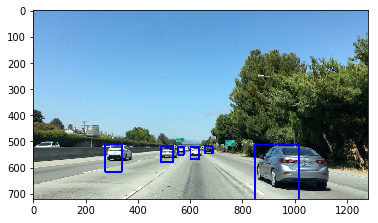

In [7]:
plt.imshow(image)

I try it on the second image, temp-matching-example-2.jpg

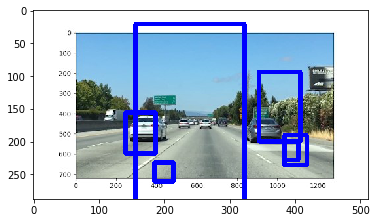

In [8]:
image=mpimg.imread('../img/code/temp-matching-example-2.jpg')
bbox_list=find_matches(image,templist)
image=draw_boxes_on(image,bbox_list,color=(0,0,255),thick=6)
plt.imshow(image)

In the second image, all of the same six cars are visible (just a few seconds later in the video), but I'll find that none of the templates find the correct match! This is because with template matching we can only find very close matches, and changes in size or orientation of a car make it impossible to match with a template. 